In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
salary_df = pd.read_csv("./Salary_Data - Salary_Data.csv")
sample_df = pd.read_csv("./Sample_Data - Sample_Data.csv")

In [3]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
salary_df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [5]:
salary_df.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5103,34.0,Male,PhD,Director of Marketing,12.0,170000.0
3869,39.0,Female,Master's Degree,Human Resources Manager,11.0,120000.0
2463,41.0,Male,Master's Degree,Front end Developer,13.0,127346.0
3175,34.0,Male,Master's Degree,Data Scientist,9.0,140000.0
4563,30.0,Female,Bachelor's Degree,Web Developer,4.0,65000.0


In [6]:
sample_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,NaN,48000.0,Yes
2,Germany,30.0,54000.0,No
3,USA,20.0,35000.0,N0
4,Spain,38.0,61000.0,No


In [7]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    15 non-null     object 
 1   Age        13 non-null     float64
 2   Salary     14 non-null     float64
 3   Purchased  15 non-null     object 
dtypes: float64(2), object(2)
memory usage: 608.0+ bytes


In [8]:
sample_df.isna().sum()

Country      0
Age          2
Salary       1
Purchased    0
dtype: int64

In [9]:
sample_df[sample_df['Age'].isna()]

,Country,Age,Salary,Purchased
1,Spain,NaN,48000.0,Yes
8,Spain,NaN,52000.0,No


In [12]:
int(sample_df["Age"].mean())

37

In [17]:
sample_df.fillna(value=int(sample_df["Age"].mean()), inplace=True)
sample_df["Age"].isna().any()

np.False_

<Axes: >

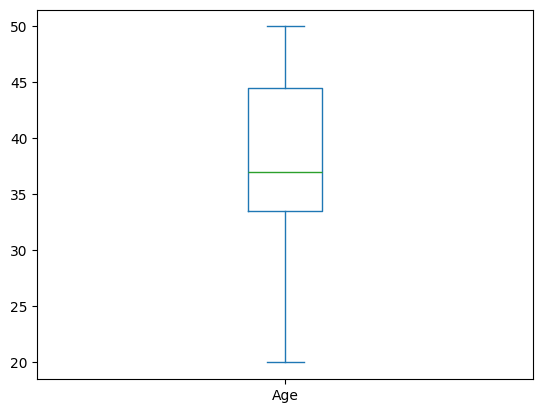

In [19]:
sample_df[["Age"]].plot(kind="box")

In [21]:
sample_df['Salary'].describe()

count       15.000000
mean     55869.133333
std      20972.091111
min         37.000000
25%      49000.000000
50%      58000.000000
75%      69500.000000
max      83000.000000
Name: Salary, dtype: float64

In [22]:
sample_df.fillna(value=int(sample_df["Salary"].mean()),inplace=True)
sample_df.isna().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

<Axes: >

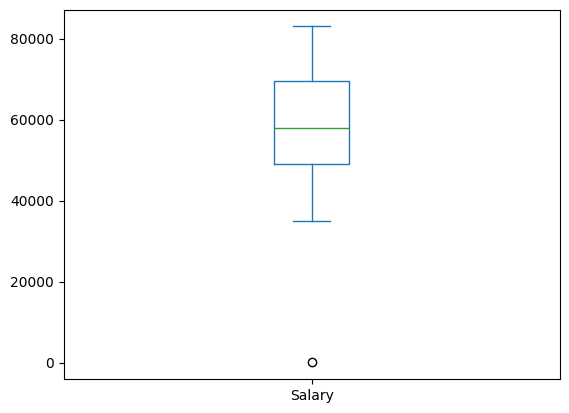

In [24]:
sample_df["Salary"].plot(kind="box")


In [25]:
q1 = sample_df["Salary"].quantile(0.25)
q3 = sample_df["Salary"].quantile(0.75)
IQR = q3-q1
upper_bound = q3+1.5*IQR
lower_bound = q1-1.5*IQR

In [27]:
print(q1)
print(q3)
print(IQR)
print(upper_bound)
print(lower_bound)

49000.0
69500.0
20500.0
100250.0
18250.0


In [28]:
from pandas import Series


def remove_outlier(series:Series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    upper_bound = q3+1.5*IQR
    lower_bound = q1-1.5*IQR
    # identifying outliers
    mask = (series < lower_bound) | (series > upper_bound)

    mean_value = series[~mask].mean()

    # Replace outliers with the mean
    series.loc[mask] = mean_value
    return series



In [29]:
remove_outlier(sample_df["Salary"])


/tmp/ipykernel_135143/2470823605.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[mask] = mean_value


0     72000.000000
1     48000.000000
2     54000.000000
3     35000.000000
4     61000.000000
5     59857.142857
6     58000.000000
7     60000.000000
8     52000.000000
9     50000.000000
10    79000.000000
11    79000.000000
12    83000.000000
13    67000.000000
14    40000.000000
Name: Salary, dtype: float64

<Axes: >

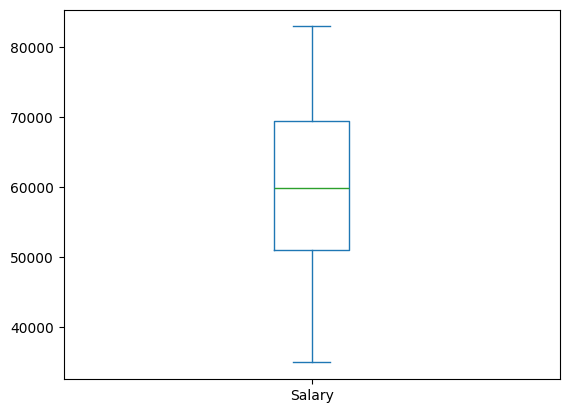

In [30]:
sample_df["Salary"].plot(kind="box")
